<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-2---King-County-Housing-Project" data-toc-modified-id="Mod-2---King-County-Housing-Project-1">Mod 2 - King County Housing Project</a></span><ul class="toc-item"><li><span><a href="#King-County" data-toc-modified-id="King-County-1.1">King County</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2">Methodology</a></span></li><li><span><a href="#Data-Obtaining-and-Scrubbing" data-toc-modified-id="Data-Obtaining-and-Scrubbing-1.3">Data Obtaining and Scrubbing</a></span></li><li><span><a href="#Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-Technology-town-close-to-King-County." data-toc-modified-id="Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-Technology-town-close-to-King-County.-1.4">Adding a new feature, Distance to Bellevue, which is a Technology town close to King County.</a></span></li><li><span><a href="#Selecting-our-data-based-on-the-price-of-the-house" data-toc-modified-id="Selecting-our-data-based-on-the-price-of-the-house-1.5">Selecting our data based on the price of the house</a></span></li><li><span><a href="#OLS-Model-Baseline" data-toc-modified-id="OLS-Model-Baseline-1.6">OLS Model Baseline</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.7">Feature Selection</a></span></li><li><span><a href="#Variance-Inflation-Factor" data-toc-modified-id="Variance-Inflation-Factor-1.8">Variance Inflation Factor</a></span></li><li><span><a href="#Reselecting-the-variables" data-toc-modified-id="Reselecting-the-variables-1.9">Reselecting the variables</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.10">Conclusion</a></span></li></ul></li></ul></div>

## Mod 2 - King County Housing Project

Please fill out:
* __Student name: Vidya Menon__
* __Student pace: Full Time__
* __Scheduled project review date/time: 05/04/2020 3PM__
* __Instructor name: Amber Yandow__


### King County
King County is a county located in the U.S. state of Washington. It is one of the most populous county in Washington. King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
This notebook contains analysis of the housing data in King County to understand which factors are important when selling a house.

Through this analysis we are going to answer some of the questions as below:    
__Q1- What is the average cost of a house in King County?__

__Q2- Does Renovation have an effect on increasing the price of a house?__

__Q3- What are the important features to consider while selling a house?__

__Q4- How does the distance to a workplace effect the cost of a house?__

__Q5- Does having a waterfront view effect the price of a house?__


In [288]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import lmplot
from seaborn import distplot, boxplot, despine

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure
from matplotlib.pyplot import subplot
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import scipy

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas_bokeh
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [289]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [290]:
!ls

column_names.md
CONTRIBUTING.md
halfway-there.gif
kc_house_data.csv
LICENSE.md
mod2_project_rubric.pdf
README.md
Rough_Copy.ipynb
Rough_Copy-Copy1.ipynb
student.ipynb
student-Copy1.ipynb


 ### Methodology
*__OSEMN Methodology__ -  This is the one of the most straightforward of the Data Science processes. During this process,the stages often blur together. It is completely acceptable (and often a best practice!) to float back and forth between stages as you learn new things about your problem, dataset, requirements, etc. It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. As with any of the frameworks, OSEMN is meant to be treated more like a set of guidelines for structuring your project than set-in-stone steps that cannot be violated.

- __Obtain__ - This step involves understanding stakeholder requirements, gathering information on the problem, and finally, sourcing data that we think will be necessary for solving this problem.
- __Scrub__ - During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.
- __Explore__ -  During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks like that.
- __Model__ -  It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.
- __Interpret__ - During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. If your results are satisfactory to all stakeholders involved, you may also go from this stage right into putting your model into production and automating processes necessary to support it.

### Data Obtaining and Scrubbing

In [291]:
king_data = pd.read_csv('kc_house_data.csv')
display(king_data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [292]:
king_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [293]:
# ax=gdf['geometry'].plot()
# ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)

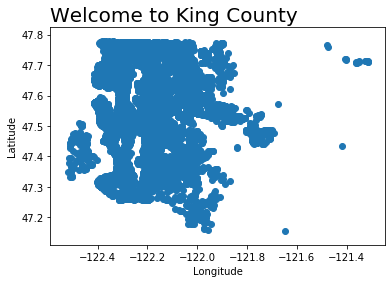

In [373]:
plt.scatter(x='long',y='lat',data=king_data)
plt.title('Welcome to King County',fontsize=20,loc='left')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show();


- __In our data file, the term Condition refers to the “Building Condition”. It has values between 1 and 5, where 1 indicates a worn-out property and 5 indicates a very good condition.__
- __Grade has an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.__ 
- __View - An index from 0 to 4 of how good the view of the property is.__

In [296]:
# Checking the range of our data which shows that it is from May 2014 to May 2015
king_data['date'] = pd.to_datetime(king_data['date'])
print(king_data['date'].min(), king_data['date'].max())

2014-05-02 00:00:00 2015-05-27 00:00:00


<Figure size 1440x720 with 0 Axes>

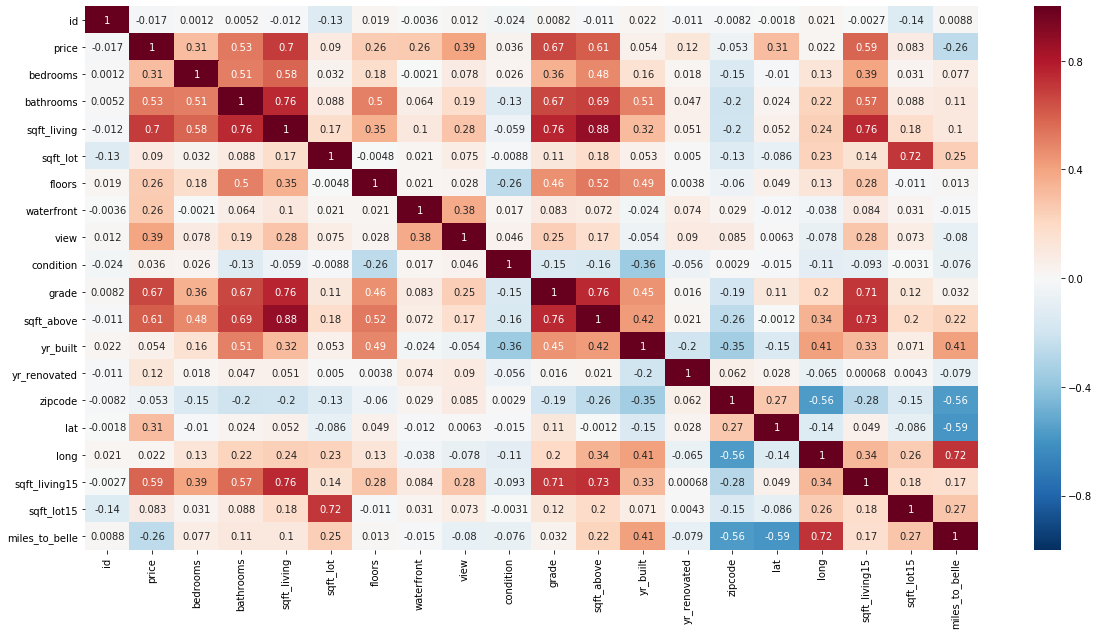

In [423]:
correlation = king_data.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [298]:
np.round(king_data.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [299]:
print ("The average home price in King County is $" + str(int(round(king_data.price.mean()))))

The average home price in King County is $540297


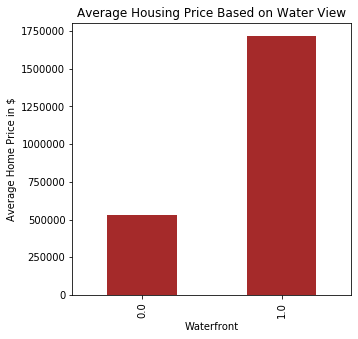

In [438]:
#To understand the effect of waterview on the price of a house

king_data.groupby("waterfront").price.mean().plot(kind="bar",figsize=(5,5),color='brown');
plt.title("Average Housing Price Based on Water View")
plt.ylabel("Average Home Price in $")
plt.xlabel("Waterfront");

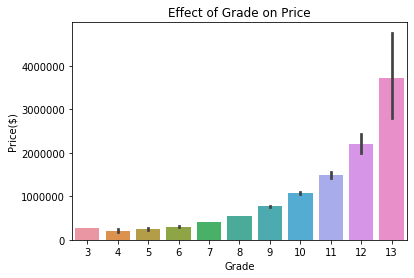

In [436]:
sns.barplot(x=king_data['grade'], y=king_data['price']).set(title = 'Effect of Grade on Price', xlabel = 'Grade', ylabel = 'Price($)' );

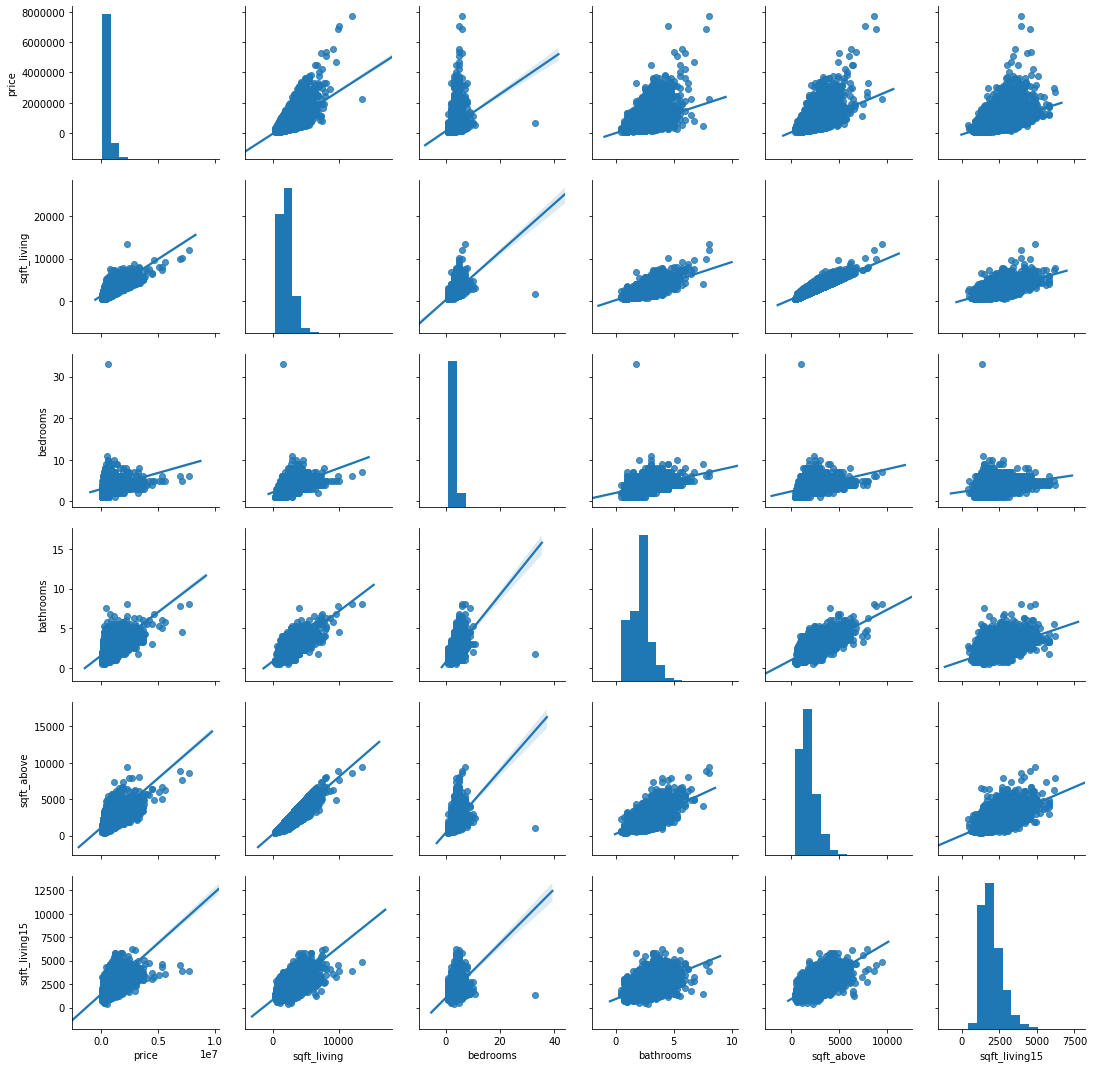

In [302]:
sns.pairplot(king_data[["price","sqft_living","bedrooms","bathrooms","sqft_above","sqft_living15"]],kind="reg")

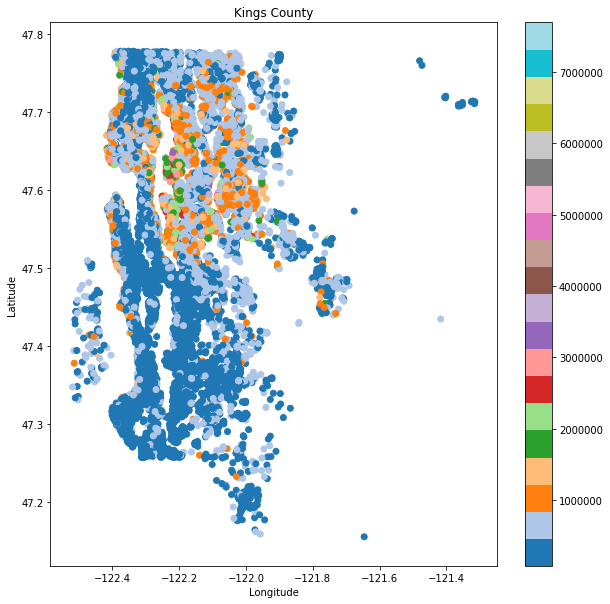

In [303]:
#Used the reference here for colormaps - https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize= (10, 10))
x = king_data['long']
y = king_data['lat']

plt.scatter(x, y, c=king_data['price'], cmap='tab20', marker='o')
plt.title('Kings County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show;

In [304]:
special_features = ["waterfront", "grade","bedrooms","bathrooms"]

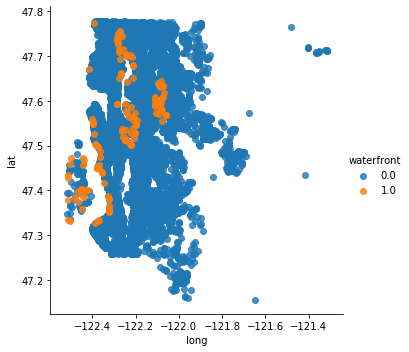

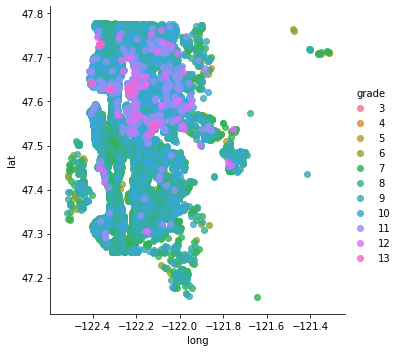

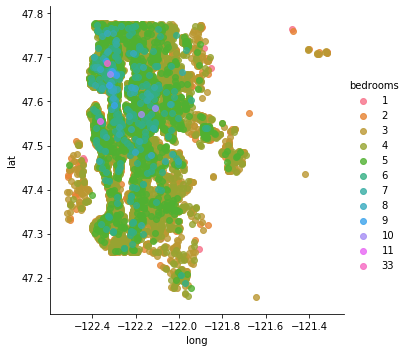

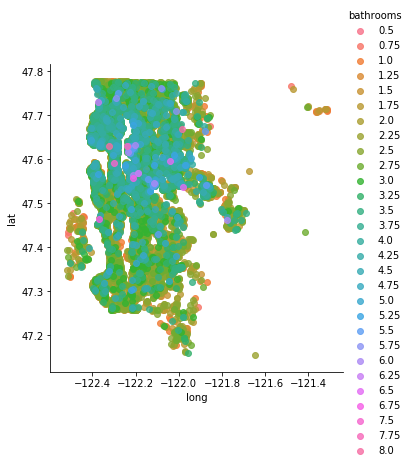

In [305]:
for x in special_features:

    lmplot(data=king_data, x="long", y="lat", fit_reg=False, hue=x, height=5)
    show();

<Figure size 360x360 with 0 Axes>

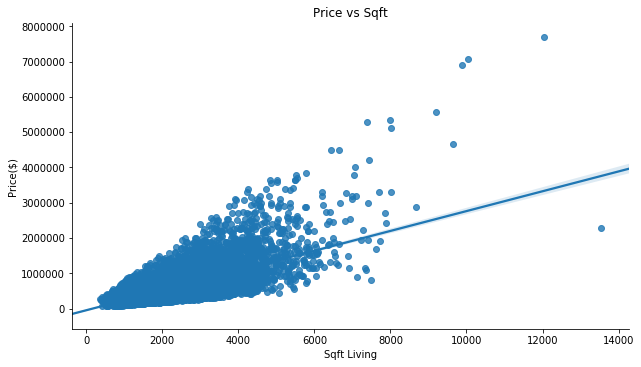

In [306]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=king_data)
plt.title("Price vs Sqft")
g.set_xlabels("Sqft Living")
g.set_ylabels("Price($)")
plt.show();

<Figure size 360x360 with 0 Axes>

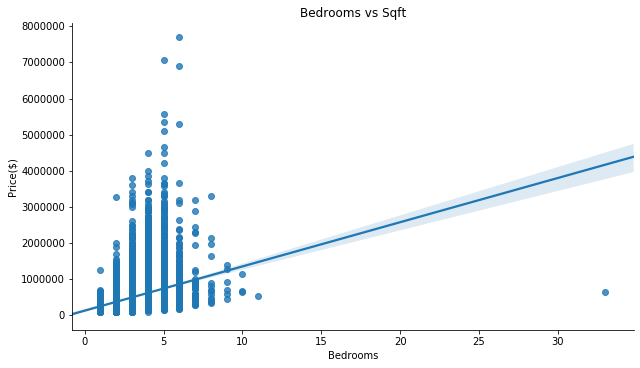

In [307]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="bedrooms", y="price",aspect=1.8,data=king_data)
plt.title("Bedrooms vs Sqft")
g.set_xlabels("Bedrooms")
g.set_ylabels("Price($)")
plt.show();

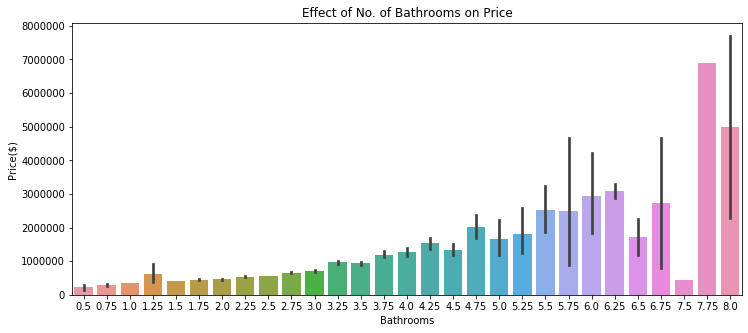

In [440]:
plt.figure(figsize=(12,5))
sns.barplot(x=king_data.bathrooms, y=king_data.price).set(title = 'Effect of No. of Bathrooms on Price', xlabel = 'Bathrooms', ylabel = 'Price($)' );

In [309]:
king_data['condition'].unique()
king_data['grade'].unique()
king_data['zipcode'].unique()
king_data['zipcode'].value_counts()
king_data['sqft_basement'].value_counts()

array([3, 5, 4, 1, 2], dtype=int64)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2400.0        1
792.0         1
784.0         1
3000.0        1
1913.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [310]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

array([nan,  0.,  1.])

In [311]:
king_data.fillna(0, inplace=True)

In [312]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([0., 3., 4., 2., 1.])

array([0., 1.])

In [313]:
# Replacing the '?' in our data frame
king_data = king_data.replace(to_replace='?', value = 0.0)
king_data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
792.0         1
2400.0        1
784.0         1
3000.0        1
1913.0        1
Name: sqft_basement, Length: 304, dtype: int64

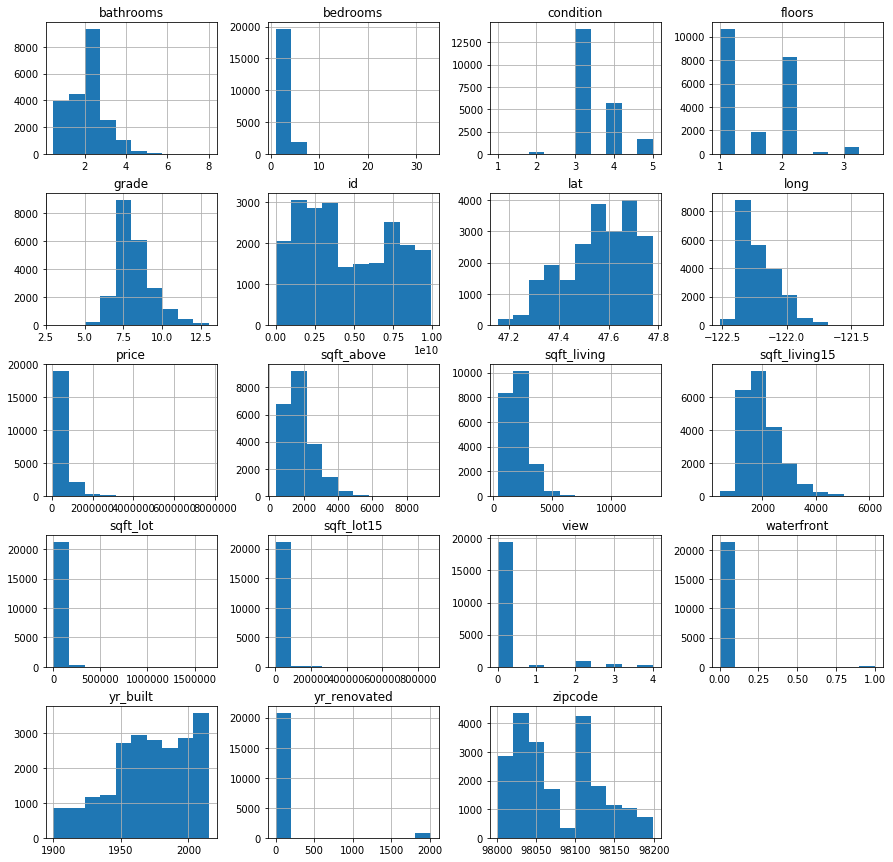

In [314]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
king_data.hist(ax = ax);

In [315]:
#Create a new column to indicate if the house is renovated or not.

king_data['renovated'] = king_data['yr_renovated']
king_data['renovated'] = king_data['renovated'].astype(str)
king_data['renovated']=np.where(king_data['renovated'] != '0.0' , '1', '0')
king_data.head()
king_data['renovated'].unique()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


array(['0', '1'], dtype=object)

### Adding a new feature, Distance to Bellevue, which is a Technology town close to King County.
With the help of Haversine formula we can find the distance between the locations using the Latitude and Longitude. 
The reasoning behind this is that people tend to select their homes based on the proximity to their workplaces. 

In [316]:
# Distance function
from haversine import haversine

# Location of Bellevue
bellevue = (47.6111636,-122.3729398)

# Initialize a list to store the distances between locations and Bellevue  
# Then loop through the dataframe and calculate distance using Haversine formula
distance_diff= []
dist_belle = []

for index, row in king_data.iterrows():
    distance_diff.append(haversine(bellevue, (row['lat'],row['long']) , unit='mi'))
    
# Store the values in the dataframe
king_data['miles_to_belle'] = distance_diff


In [317]:
king_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,8.770690
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,10.911701
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537


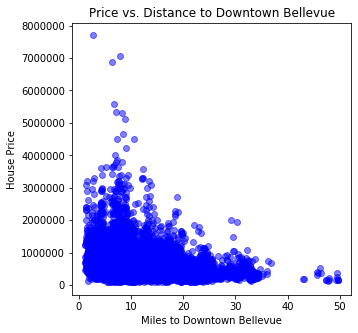

In [318]:
plt.figure(figsize = (5,5));
plt.scatter(king_data['miles_to_belle'],king_data['price'],alpha=0.5, color='blue')
plt.title("Price vs. Distance to Downtown Bellevue")
plt.xlabel("Miles to Downtown Bellevue")
plt.ylabel("House Price")

plt.show();


In [319]:
king_data['miles_to_belle'].unique()

array([ 8.77069009,  7.99324404, 10.91170126, ...,  6.96008862,
        3.63417743,  3.64084605])

In [320]:
def plotting_histo(data_param, col_param):
    for x in col_param:
        fig, ax = plt.subplots(1,2,sharey=True)
        ax[0].hist(data_param[x])
        ax[0].set_ylabel("Counts")
        ax[0].set_xlabel("No. of "+x)
    
        ax[1].hist(data_param[x].apply(np.log))
        ax[1].set_xlabel("Log Value of "+x)

        plt.suptitle("Comparison for "+x,color='red')
        plt.show();

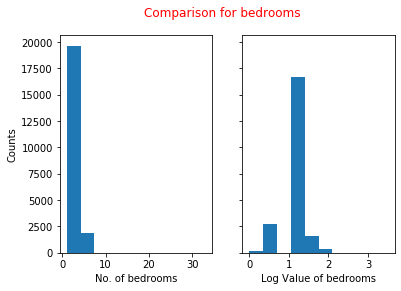

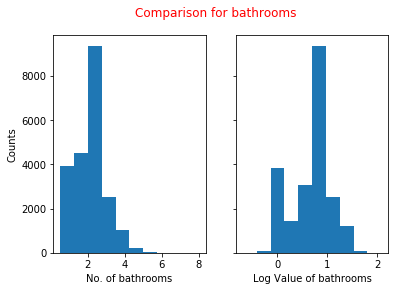

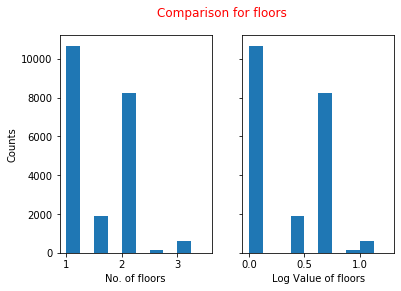

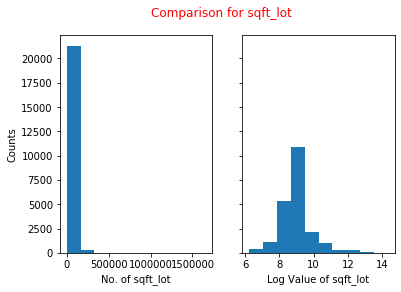

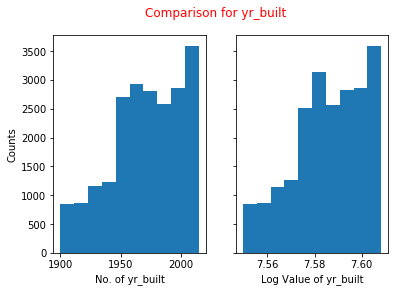

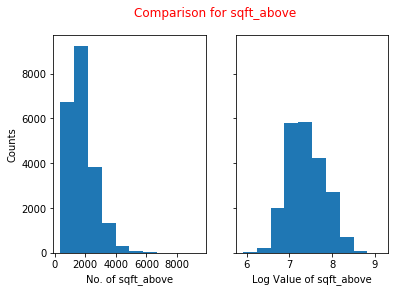

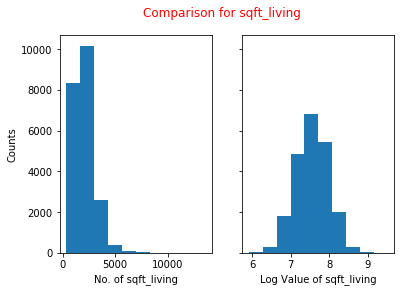

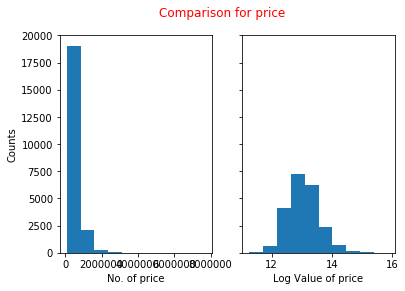

In [321]:
colList=['bedrooms','bathrooms','floors','sqft_lot','yr_built','sqft_above','sqft_living','price']
plotting_histo(king_data,colList)

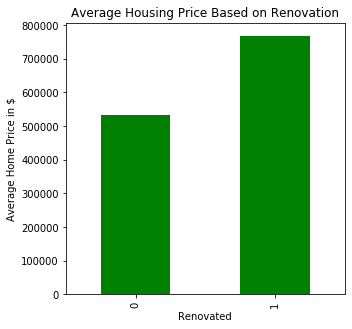

In [322]:
#To understand the effect of waterview on the price of a house

king_data.groupby("renovated").price.mean().plot(kind="bar",figsize=(5,5),color="green");
plt.title("Average Housing Price Based on Renovation")
plt.ylabel("Average Home Price in $")
plt.xlabel("Renovated");

### Selecting our data based on the price of the house

In [323]:
# Creating a new data frame for prices between 300000 and 1MN
king_data_price=king_data[(king_data['price'] >= 300000) & (king_data['price'] <= 800000)]
king_data_price
log_king=king_data_price.copy()
len(king_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,10.643058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,6.217377
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,6.960089
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,3.634177
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,15.125662


14226

In [445]:
# Creating a new data frame for prices between 300000 and 1MN
new_data_price=king_data[(king_data['price'] >= 300000) & (king_data['price'] <= 600000)]
new_data_price.head()

len(new_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,0.0,1927,0.0,98028,47.7558,-122.229,1780,12697,0,12.029012


10915

In [324]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null object
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null object
miles_

In [325]:
price_perc=(len(king_data_price)/len(king_data)) * 100
print(price_perc)

65.87025975829977


In [326]:
king_data_price['sqft_basement'] = king_data_price.sqft_basement.astype('float')
king_data_price['renovated'] = king_data_price.renovated.astype('int')
king_data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null float64
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null int32
miles_

In [327]:
# create a chart to have the top 10 zipcodes that have the costliest houses
cols=['zipcode','price']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()

mytemp=temp.sort_values(by=('price'),ascending=False).head(10)
mytemp.plot_bokeh.bar()

Figure(id='2435', ...)

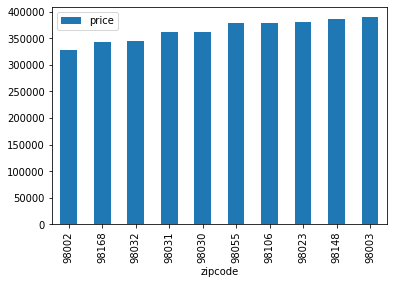

In [328]:
# create a chart to have the top 10 zipcodes that have the cheapest houses
cols=['zipcode','price']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()

mytemp=temp.sort_values(by=('price'),ascending=True).head(10)
mytemp.plot.bar()

In [410]:
# the 10 most expansive and 10 least expansive zipcodes in king county

cols=['price','bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'miles_to_belle','zipcode']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()
temp.sort_values(by=('price'),ascending=False).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98039,787500.000000,4.000000,1.750000,1.000000,1580.000000,9382.000000,6.771998
98004,701545.910448,3.298507,1.735075,1.216418,1741.343284,10121.223881,8.249929
98040,700457.701493,3.343284,1.992537,1.126866,1988.059701,10956.656716,7.445061
98075,657932.455319,3.748936,2.524468,1.744681,2638.344681,17787.731915,16.410089
98005,646046.115789,3.652632,2.181579,1.136842,2157.578947,12766.873684,9.623478
98109,623970.081967,2.950820,1.819672,1.631148,1555.081967,3016.311475,2.171019
98112,623131.600000,2.936364,1.829545,1.613636,1706.727273,3388.381818,3.623016
98119,612657.432432,2.927928,1.986486,1.684685,1605.945946,3052.387387,2.132139
98006,592594.615672,3.660448,2.175373,1.289179,2186.406716,11410.708955,10.892495


In [330]:
temp.sort_values(by=('price')).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98002,327318.421053,4.526316,2.907895,1.710526,2459.473684,7952.210526,21.475399
98168,342075.104167,3.500000,2.062500,1.291667,2082.500000,13081.250000,8.854211
98032,344185.818182,4.136364,2.284091,1.454545,2575.272727,13225.272727,17.386073
98031,362512.796610,3.737288,2.480932,1.745763,2328.855932,15545.177966,16.721656
98030,362667.770642,3.844037,2.440367,1.756881,2433.559633,15567.844037,18.743389
98055,378058.047244,3.653543,2.316929,1.519685,2200.023622,12285.070866,13.337798
98106,379055.740933,3.455959,2.079016,1.430052,1756.689119,5817.725389,4.991792
98023,380805.116564,3.711656,2.519939,1.628834,2683.496933,12866.042945,20.904745
98148,385437.647059,3.529412,2.397059,1.529412,2136.470588,9100.764706,12.089292


In [331]:
# View with Price

cols=['price','view']
temp_df=king_data_price.loc[:, cols]
temp_df.groupby('view').mean().plot_bokeh.bar()

Figure(id='2568', ...)

In [332]:
king_data_price = king_data_price.drop('date',axis=1)
king_data_price = king_data_price.drop('id', axis=1)
king_data_price.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
10,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,10.643058
11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943
12,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,...,0.0,1927,0.0,98028,47.7558,-122.229,1780,12697,0,12.029012
13,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,...,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,0,15.275541
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,...,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.181765
15,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,9,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,0,2.749080


In [333]:
# Creating a dictionary to save results of the models being used. 

def store_results_to_dict(model_name, model_desc, r2, r2_adj,train_rmse,test_rmse):
    
    curr_dict = {'Model Name':model_name
                 ,'Model Description':model_desc
                 ,'R2 value':r2
                 ,'R2 Adjusted value':r2_adj
                 ,'Train RMSE':train_rmse
                 ,'Test RMSE':test_rmse
                } 
              
    return curr_dict

# Want to keep a track of all results
results = []

### OLS Model Baseline

In [334]:
# OLS Modelling

outcome = 'price'
predictors = king_data_price.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=king_data_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:07:23   Log-Likelihood:            -1.8191e+05
No. Observations:               14226   AIC:                         3.639e+05
Df Residuals:                   14205   BIC:                         3.640e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.982e+07   2.04e+06     29.316      0.000    5.58e+07    6.38e+07
bedrooms       -7701.4984   1011.008     -7.618      0.000   -9683.207   -5719.790
bathrooms       1.184e+04   1795.589      6.593      0.000    8318.662    1.54e+04
sqft_living       51.0120      9.705      5.256      0.000      31.988      70.035
sqft_lot           0.3031      0.027     11.173      0.000       0.250       0.356
floors          6883.4440   1963.980      3.505      0.000    3033.786    1.07e+04
waterfront      1.509e+05   1.58e+04      9.561      0.000     1.2e+05    1.82e+05
view            2.244e+04   1281.762     17.506      0.000    1.99e+04     2.5e+04
condition       1.762e+04   1290.855     13.649      0.000    1.51e+04    2.01e+04
grade           4.763e+04   1224.995     38.881      0.000    4.52e+04       5e+04
sqft_above        19.9263      9.696      2.055      0.040       0.920      38.932
sqft_basement     -5.5314      9.590     -0.577      0.564     -24.329      13.266
yr_built       -1016.2533     40.731    -24.951      0.000   -1096.090    -936.416
yr_renovated    1080.6153    263.516      4.101      0.000     564.089    1597.142
zipcode         -167.5217     19.539     -8.574      0.000    -205.821    -129.222
lat             1.731e+05   7343.058     23.575      0.000    1.59e+05    1.88e+05
long            4.059e+05   9913.876     40.947      0.000    3.87e+05    4.25e+05
sqft_living15     42.3014      2.051     20.624      0.000      38.281      46.322
sqft_lot15         0.1689      0.041      4.166      0.000       0.089       0.248
renovated      -2.142e+06   5.26e+05     -4.075      0.000   -3.17e+06   -1.11e+06
miles_to_belle -1.482e+04    253.524    -58.464      0.000   -1.53e+04   -1.43e+04
==============================================================================
Omnibus:                      326.305   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.941
Skew:                           0.321   Prob(JB):                     1.56e-84
Kurtosis:                       3.489   Cond. No.                     2.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
y = king_data_price[['price']]
X = king_data_price.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, king_data_price['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

# cross_val_score(linreg, predictors, data_price['price'], scoring='neg_mean_squared_error')
# cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
# cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)
linreg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 86599.13093644618
Test RMSE score is : 86348.52230761612
Train R2 value: 0.5854152678838835
Test R2 value: 0.5900964163161861


array([-6.20451825e+03,  1.02796197e+04,  6.59751883e+01,  2.97715986e-01,
        9.03645668e+03,  1.50162902e+05,  2.18393432e+04,  1.77965125e+04,
        4.81071222e+04,  3.60135105e+00, -1.95568253e+01, -1.03642864e+03,
        7.57706967e+02, -1.65400371e+02,  1.68673866e+05,  4.05722686e+05,
        4.16361334e+01,  1.61888111e-01, -1.49463031e+06, -1.46849457e+04])

In [336]:
results = store_results_to_dict('Baseline Model','Baseline(with all variables)'
                                     ,model.rsquared, model.rsquared_adj
                                    ,train_rmse, test_rmse)
results

{'Model Name': 'Baseline Model',
 'Model Description': 'Baseline(with all variables)',
 'R2 value': 0.5869337430899484,
 'R2 Adjusted value': 0.5863521644107368,
 'Train RMSE': 86599.13093644618,
 'Test RMSE': 86348.52230761612}

In [337]:
results_final = []
results_final.append(results)

### Feature Selection

In [383]:
scaled_bed = (king_data_price.bedrooms - king_data_price.bedrooms.mean()) / king_data_price.bedrooms.std()
scaled_bath = (king_data_price.bathrooms - king_data_price.bathrooms.mean()) / king_data_price.bathrooms.std()
scaled_lot = (king_data_price.sqft_lot - king_data_price.sqft_lot.mean()) / king_data_price.sqft_lot.std()
scaled_built = (king_data_price.yr_built - king_data_price.yr_built.mean()) / king_data_price.yr_built.std()
scaled_lat = (king_data_price.lat - king_data_price.lat.mean()) / king_data_price.lat.std()
scaled_long = (king_data_price.long - king_data_price.long.mean()) / king_data_price.long.std()
scaled_sqft_living15 = (king_data_price.sqft_living15 - king_data_price.sqft_living15.mean()) / king_data_price.sqft_living15.std()
scaled_miles_to_belle = (king_data_price.miles_to_belle - king_data_price.miles_to_belle.mean()) / king_data_price.miles_to_belle.std()

data_final = pd.DataFrame([])
data_final['bedrooms'] = scaled_bed
data_final['bathrooms'] = scaled_bath
data_final['sqft_lot'] = scaled_lot
data_final['built'] = scaled_built
data_final['lat'] = scaled_lat
data_final['long'] = scaled_long
data_final['sqft_liv'] = scaled_sqft_living15
data_final['miles_belle'] = scaled_miles_to_belle

grade_dummies = pd.get_dummies(king_data_price['grade'], prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(king_data_price['condition'], prefix='cond', drop_first=True)
view_dummies = pd.get_dummies(king_data_price['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(king_data_price['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(king_data_price['zipcode'], prefix='zip', drop_first=True)
reno_dummies = pd.get_dummies(king_data_price['renovated'], prefix='reno', drop_first=True)

sale_price = king_data_price['price']
data_final = pd.concat([sale_price,data_final,grade_dummies,condition_dummies,zipcode_dummies,view_dummies,waterfront_dummies,reno_dummies], axis=1)
data_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 95 columns):
price          14226 non-null float64
bedrooms       14226 non-null float64
bathrooms      14226 non-null float64
sqft_lot       14226 non-null float64
built          14226 non-null float64
lat            14226 non-null float64
long           14226 non-null float64
sqft_liv       14226 non-null float64
miles_belle    14226 non-null float64
grade_5        14226 non-null uint8
grade_6        14226 non-null uint8
grade_7        14226 non-null uint8
grade_8        14226 non-null uint8
grade_9        14226 non-null uint8
grade_10       14226 non-null uint8
grade_11       14226 non-null uint8
cond_2         14226 non-null uint8
cond_3         14226 non-null uint8
cond_4         14226 non-null uint8
cond_5         14226 non-null uint8
zip_98002      14226 non-null uint8
zip_98003      14226 non-null uint8
zip_98004      14226 non-null uint8
zip_98005      14226 non-null uint8
zip_98006

In [384]:
data_final=data_final.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 95 columns):
price          14226 non-null float64
bedrooms       14226 non-null float64
bathrooms      14226 non-null float64
sqft_lot       14226 non-null float64
built          14226 non-null float64
lat            14226 non-null float64
long           14226 non-null float64
sqft_liv       14226 non-null float64
miles_belle    14226 non-null float64
grade_5        14226 non-null uint8
grade_6        14226 non-null uint8
grade_7        14226 non-null uint8
grade_8        14226 non-null uint8
grade_9        14226 non-null uint8
grade_10       14226 non-null uint8
grade_11       14226 non-null uint8
cond_2         14226 non-null uint8
cond_3         14226 non-null uint8
cond_4         14226 non-null uint8
cond_5         14226 non-null uint8
zip_98002      14226 non-null uint8
zip_98003      14226 non-null uint8
zip_98004      14226 non-null uint8
zip_98005      14226 non-null uint8
zip_98006

In [385]:
#Model Prediction 1
outcome1 = 'price'
predictors_1 = data_final.drop('price', axis=1)
pred_sum_1 = '+'.join(predictors_1.columns)
formula = outcome1 + '~' + pred_sum_1

model1 = ols(formula=formula, data=data_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     313.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:27:01   Log-Likelihood:            -1.8018e+05
No. Observations:               14226   AIC:                         3.605e+05
Df Residuals:                   14131   BIC:                         3.613e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.492e+05   4.14e+04      8.432      0.000    2.68e+05     4.3e+05
bedrooms      1.22e+04    777.433     15.687      0.000    1.07e+04    1.37e+04
bathrooms    2.138e+04    959.313     22.291      0.000    1.95e+04    2.33e+04
sqft_lot     1.416e+04    736.352     19.236      0.000    1.27e+04    1.56e+04
built       -2.327e+04   1095.460    -21.238      0.000   -2.54e+04   -2.11e+04
lat          2477.1624   5014.676      0.494      0.621   -7352.264    1.23e+04
long         6.424e+04   5946.112     10.803      0.000    5.26e+04    7.59e+04
sqft_liv     3.846e+04    989.962     38.854      0.000    3.65e+04    4.04e+04
miles_belle -7.364e+04   4949.881    -14.877      0.000   -8.33e+04   -6.39e+04
grade_5      1.744e+04   3.31e+04      0.527      0.598   -4.75e+04    8.24e+04
grade_6       567.1388   3.17e+04      0.018      0.986   -6.15e+04    6.27e+04
grade_7      4.375e+04   3.16e+04      1.384      0.166   -1.82e+04    1.06e+05
grade_8      9.396e+04   3.16e+04      2.969      0.003    3.19e+04    1.56e+05
grade_9      1.655e+05   3.17e+04      5.220      0.000    1.03e+05    2.28e+05
grade_10     2.055e+05   3.19e+04      6.434      0.000    1.43e+05    2.68e+05
grade_11      2.33e+05   3.58e+04      6.512      0.000    1.63e+05    3.03e+05
cond_2       2.434e+04   2.42e+04      1.006      0.315   -2.31e+04    7.18e+04
cond_3       4.008e+04   2.25e+04      1.779      0.075   -4086.958    8.42e+04
cond_4       5.513e+04   2.25e+04      2.447      0.014     1.1e+04    9.93e+04
cond_5       8.094e+04   2.26e+04      3.579      0.000    3.66e+04    1.25e+05
zip_98002   -2.891e+04   1.93e+04     -1.497      0.134   -6.68e+04    8948.463
zip_98003   -9162.2891    1.1e+04     -0.833      0.405   -3.07e+04    1.24e+04
zip_98004    1.861e+05   1.89e+04      9.843      0.000    1.49e+05    2.23e+05
zip_98005    8.252e+04   1.82e+04      4.541      0.000    4.69e+04    1.18e+05
zip_98006    2.936e+04    1.6e+04      1.830      0.067   -2088.073    6.08e+04
zip_98007    2.434e+04   1.81e+04      1.343      0.179   -1.12e+04    5.99e+04
zip_98008    2.718e+04   1.77e+04      1.538      0.124   -7465.946    6.18e+04
zip_98010    4.214e+04   1.53e+04      2.751      0.006    1.21e+04    7.22e+04
zip_98011   -8200.5991      2e+04     -0.411      0.681   -4.74e+04     3.1e+04
zip_98014   -4.121e+04   2.25e+04     -1.834      0.067   -8.52e+04    2823.351
zip_98019    -5.54e+04   2.22e+04     -2.493      0.013    -9.9e+04   -1.18e+04
zip_98022   -7621.4177   1.41e+04     -0.541      0.589   -3.52e+04       2e+04
zip_98023   -1.342e+04   1.03e+04     -1.303      0.192   -3.36e+04    6759.903
zip_98024    -1.95e+04    2.1e+04     -0.927      0.354   -6.07e+04    2.17e+04
zip_98027    7608.4077   1.58e+04      0.482      0.630   -2.33e+04    3.85e+04
zip_98028   -7697.2236   1.95e+04     -0.39

In [386]:
X_train, X_test, y_train, y_test = train_test_split(predictors_1, data_final['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

#cross_val_score(linreg, predictors, data_final['price'], scoring='r2')
cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="r2"))
cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="r2"))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
print(cv_10_res_mean,cv_10_res_std)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print(train_r_squared,test_r_squared)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 76132.13668780257
Test RMSE score is : 78403.93189116975
-3.9277415885670617e+21 1.1783224765701186e+22
0.6805505497775204 0.6590370835314798


In [378]:
results = store_results_to_dict('Model1','All preliminary variables included after Feature selection'
                                     ,model1.rsquared, model1.rsquared_adj
                                    ,train_rmse, test_rmse)
results

{'Model Name': 'Model1',
 'Model Description': 'All preliminary variables included after Feature selection',
 'R2 value': 0.5555138730249376,
 'R2 Adjusted value': 0.554731327026742,
 'Train RMSE': 89866.16971690375,
 'Test RMSE': 89500.9659671168}

In [379]:
results_final.append(results)

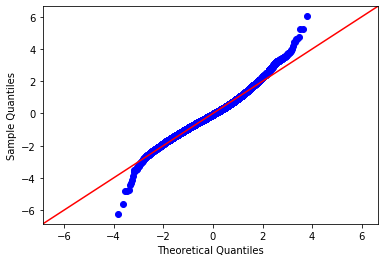

In [387]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

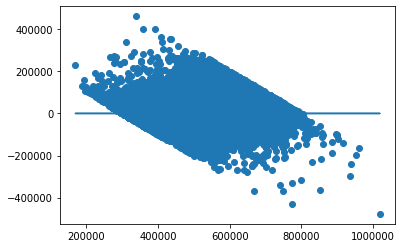

In [345]:
plt.scatter(model1.predict(predictors_1), model1.resid)
plt.plot(model1.predict(predictors_1), [0 for i in range(len(predictors_1))]);

In [388]:
#Dropping columns based on p value
data_final.drop(['lat','grade_5','grade_6','grade_7','zip_98002','zip_98003','zip_98007','zip_98008','zip_98011','zip_98014','zip_98019','zip_98022','zip_98023','zip_98024','zip_98027','zip_98028','zip_98028','zip_98034','zip_98045','zip_98065','zip_98072','zip_98074','zip_98075','zip_98077','zip_98118','zip_98125','zip_98126','zip_98133','zip_98136','zip_98144','zip_98146','zip_98148','zip_98155','zip_98166','zip_98198','cond_2'], axis=1,inplace=True)
#data_final.drop(['grade_5','grade_6','grade_7','cond_2','cond_3','cond_4'], axis=1,inplace=True)
data_final.head()

,price,bedrooms,bathrooms,sqft_lot,built,long,sqft_liv,miles_belle,grade_8,grade_9,...,zip_98177,zip_98178,zip_98188,zip_98199,view_1,view_2,view_3,view_4,water_1,reno_1
1,538000.0,-0.403233,0.213027,-0.190405,-0.702933,-0.743557,-0.472302,-0.569419,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.691289,1.346072,-0.245358,-0.235278,-1.249225,-1.066235,-0.819668,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.403233,-0.164655,-0.169865,0.499607,1.128781,-0.274324,0.515888,1,0,...,0,0,0,0,0,0,0,0,0,0
9,323000.0,-0.403233,0.590708,-0.207121,1.034069,1.224448,0.787557,1.689126,0,0,...,0,0,0,0,0,0,0,0,0,0
10,662500.0,-0.403233,0.590708,-0.127804,-0.235278,0.445446,0.463593,-0.174724,1,0,...,0,0,0,0,0,0,0,0,0,0


In [389]:
#Model Prediction 2
outcome2 = 'price'
predictors_2 = data_final.drop('price', axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula = outcome2 + '~' + pred_sum_2

model2 = ols(formula=formula, data=data_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     470.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:27:44   Log-Likelihood:            -1.8048e+05
No. Observations:               14226   AIC:                         3.611e+05
Df Residuals:                   14166   BIC:                         3.615e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.084e+05   8680.351     47.052      0.000    3.91e+05    4.25e+05
bedrooms     1.343e+04    782.912     17.160      0.000    1.19e+04     1.5e+04
bathrooms    2.149e+04    970.242     22.150      0.000    1.96e+04    2.34e+04
sqft_lot     1.409e+04    718.125     19.618      0.000    1.27e+04    1.55e+04
built        -1.99e+04   1085.853    -18.327      0.000    -2.2e+04   -1.78e+04
long         6.501e+04   1401.176     46.397      0.000    6.23e+04    6.78e+04
sqft_liv     4.024e+04    969.304     41.511      0.000    3.83e+04    4.21e+04
miles_belle  -8.59e+04   1605.181    -53.513      0.000    -8.9e+04   -8.28e+04
grade_8      5.362e+04   1743.723     30.752      0.000    5.02e+04     5.7e+04
grade_9      1.238e+05   2728.569     45.357      0.000    1.18e+05    1.29e+05
grade_10     1.682e+05   4755.638     35.367      0.000    1.59e+05    1.78e+05
grade_11     1.945e+05    1.7e+04     11.432      0.000    1.61e+05    2.28e+05
cond_3       2.485e+04   8681.859      2.862      0.004    7831.114    4.19e+04
cond_4       4.286e+04   8687.150      4.934      0.000    2.58e+04    5.99e+04
cond_5       6.834e+04   8933.100      7.650      0.000    5.08e+04    8.59e+04
zip_98004    1.753e+05   9723.116     18.027      0.000    1.56e+05    1.94e+05
zip_98005    7.312e+04   8213.065      8.903      0.000     5.7e+04    8.92e+04
zip_98006    2.047e+04   5034.048      4.067      0.000    1.06e+04    3.03e+04
zip_98010     5.15e+04   1.01e+04      5.114      0.000    3.18e+04    7.12e+04
zip_98029    3.328e+04   4911.074      6.777      0.000    2.37e+04    4.29e+04
zip_98030   -7.607e+04   7710.736     -9.865      0.000   -9.12e+04    -6.1e+04
zip_98031   -9.755e+04   7353.767    -13.266      0.000   -1.12e+05   -8.31e+04
zip_98032   -7.211e+04   1.69e+04     -4.275      0.000   -1.05e+05    -3.9e+04
zip_98033    7.183e+04   4911.740     14.625      0.000    6.22e+04    8.15e+04
zip_98038   -4.771e+04   4352.097    -10.961      0.000   -5.62e+04   -3.92e+04
zip_98039    2.935e+05   7.85e+04      3.741      0.000     1.4e+05    4.47e+05
zip_98040    1.234e+05   9760.120     12.644      0.000    1.04e+05    1.43e+05
zip_98042   -7.261e+04   5162.904    -14.065      0.000   -8.27e+04   -6.25e+04
zip_98052    4.809e+04   3814.949     12.605      0.000    4.06e+04    5.56e+04
zip_98053    6.669e+04   4746.657     14.050      0.000    5.74e+04     7.6e+04
zip_98055   -9.532e+04   7038.706    -13.542      0.000   -1.09e+05   -8.15e+04
zip_98056   -6.598e+04   4845.523    -13.616      0.000   -7.55e+04   -5.65e+04
zip_98058   -1.022e+05   4577.511    -22.328      0.000   -1.11e+05   -9.32e+04
zip_98059   -6.055e+04   4231.077    -14.311      0.000   -6.88e+04   -5.23e+04
zip_98070    1.096e+05   9002.890     12.172      0.000    9.19e+04    1.27e+05
zip_98092   -3.271e+04   6212.047     -5.26

In [348]:
X_train, X_test, y_train, y_test = train_test_split(predictors_2, data_final['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

# cross_val_score(linreg, predictors, data_final['price'], scoring='neg_mean_squared_error')
# cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
# cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print(train_r_squared,test_r_squared)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 77727.72068036604
Test RMSE score is : 80190.66840392858
0.66672477911642 0.6442810168248496


In [349]:
results = store_results_to_dict('Model2','After dropping values with p>0.05'
                                     ,model2.rsquared, model2.rsquared_adj
                                    ,train_rmse, test_rmse)
results

{'Model Name': 'Model2',
 'Model Description': 'After dropping values with p>0.05',
 'R2 value': 0.6618784242930491,
 'R2 Adjusted value': 0.6604701811074843,
 'Train RMSE': 77727.72068036604,
 'Test RMSE': 80190.66840392858}

In [350]:
results_final.append(results)

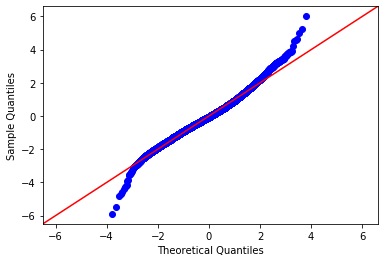

In [390]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

### Variance Inflation Factor
*Typically, variables with a vif of 5 or greater are displaying multicollinearity with other variables in the feature set. 

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = predictors_2
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors_2, vif))

[('bedrooms', 1.417392908343656),
 ('bathrooms', 2.172797611623737),
 ('sqft_lot', 1.191879247608031),
 ('built', 2.7153846500344443),
 ('long', 4.540190329948812),
 ('sqft_liv', 2.166853910327683),
 ('miles_belle', 5.954424867260861),
 ('grade_8', 2.4875361560102496),
 ('grade_9', 1.995440707717213),
 ('grade_10', 1.3502398990124411),
 ('grade_11', 1.0345365972632246),
 ('zip_98004', 1.0291937617346556),
 ('zip_98005', 1.0405884885164352),
 ('zip_98006', 1.102543096417551),
 ('zip_98010', 1.0550806610850172),
 ('zip_98029', 1.1290835907798997),
 ('zip_98030', 1.0531426404561162),
 ('zip_98031', 1.037183590771858),
 ('zip_98032', 1.017379775594828),
 ('zip_98033', 1.0724643041320594),
 ('zip_98038', 1.206719782736293),
 ('zip_98039', 1.000635692234507),
 ('zip_98040', 1.0360523162169712),
 ('zip_98042', 1.1177728710106498),
 ('zip_98052', 1.1344055174104857),
 ('zip_98053', 1.1168149074557057),
 ('zip_98055', 1.0218621801882946),
 ('zip_98056', 1.071498809187144),
 ('zip_98058', 1.0649

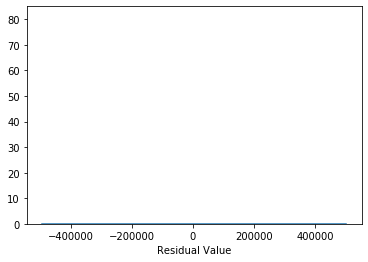

In [424]:
# mean = 0
# standard_deviation = 1
# x_values = np.arange(-5, 5, 0.1)
# y_values = scipy.stats.norm(mean, standard_deviation)
# plt.plot(x_values, y_values.pdf(x_values))

ax = sns.distplot(model2.resid, axlabel='Residual Value')
ax.set_title = 'Distribution Plot of Residuals'
ax.set_ylabel = 'Counts'
plt.hist(s, 30, normed=False);

In [354]:
df_model_results = pd.DataFrame(results_final)
df_model_results.head()

,Model Name,Model Description,R2 value,R2 Adjusted value,Train RMSE,Test RMSE
0,Baseline Model,Baseline(with all variables),0.586934,0.586352,86599.130936,86348.522308
1,Model1,All preliminary variables included after Featu...,0.676038,0.673883,76354.127829,77771.725160
2,Model2,After dropping values with p>0.05,0.661878,0.660470,77727.720680,80190.668404


### Reselecting the variables

In [355]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null object
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null object
miles_

In [356]:
#continuous = ['bedrooms','bathrooms','sqft_lot','sqft_above','sqft_living15','miles_to_belle']
continuous = ['bedrooms','bathrooms','sqft_lot','sqft_above']
#categoricals = ['waterfront','renovated', 'grade', 'zipcode','view','floors']
categoricals = ['waterfront', 'grade', 'zipcode']

In [357]:
# Log transform and normalize
log_king_cont = log_king[continuous]

# log features
log_names = [f'{column}_log' for column in log_king_cont.columns]

king_log = np.log(log_king_cont)
king_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)

In [358]:
grade_dummies = pd.get_dummies(log_king['grade'], prefix='grade', drop_first=True)
renovated_dummies = pd.get_dummies(log_king['renovated'], prefix='reno', drop_first=True)
view_dummies = pd.get_dummies(log_king['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(log_king['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(log_king['zipcode'], prefix='zip', drop_first=True)
#floor_dummies = pd.get_dummies(log_king['floors'], prefix='floor', drop_first=True)

### Conclusion

In [359]:
preprocessed = pd.concat([log_king.price,king_log_norm, grade_dummies,zipcode_dummies,waterfront_dummies,view_dummies,renovated_dummies], axis=1)
#preprocessed = pd.concat([log_king.price,king_log_norm, grade_dummies,zipcode_dummies,renovated_dummies,waterfront_dummies], axis=1)
preprocessed.head()

,price,bedrooms_log,bathrooms_log,sqft_lot_log,sqft_above_log,grade_5,grade_6,grade_7,grade_8,grade_9,...,zip_98178,zip_98188,zip_98198,zip_98199,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0,reno_1
1,538000.0,-0.291686,0.344045,-0.043067,0.780928,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.758768,1.157775,-0.433311,-1.117046,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.291686,0.010886,0.072275,0.111786,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,323000.0,-0.291686,0.642065,-0.147256,0.419732,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,662500.0,-0.291686,0.642065,0.275143,0.377899,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
#preprocessed=preprocessed.rename({'floor_1.5':'floor_0','floor_2.0':'floor_1','floor_2.5':'floor_2','floor_3.0':'floor_3','floor_3.5':'floor_4'}, axis=1)
preprocessed=preprocessed.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
#preprocessed=preprocessed.rename({'water_1.0':'water_1'}, axis=1)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 87 columns):
price             14226 non-null float64
bedrooms_log      14226 non-null float64
bathrooms_log     14226 non-null float64
sqft_lot_log      14226 non-null float64
sqft_above_log    14226 non-null float64
grade_5           14226 non-null uint8
grade_6           14226 non-null uint8
grade_7           14226 non-null uint8
grade_8           14226 non-null uint8
grade_9           14226 non-null uint8
grade_10          14226 non-null uint8
grade_11          14226 non-null uint8
zip_98002         14226 non-null uint8
zip_98003         14226 non-null uint8
zip_98004         14226 non-null uint8
zip_98005         14226 non-null uint8
zip_98006         14226 non-null uint8
zip_98007         14226 non-null uint8
zip_98008         14226 non-null uint8
zip_98010         14226 non-null uint8
zip_98011         14226 non-null uint8
zip_98014         14226 non-null uint8
zip_98019         14226

In [361]:
outcome4 = 'price'
predictors_4 = preprocessed.drop('price', axis=1)
pred_sum_4 = '+'.join(predictors_4.columns)
formula = outcome4 + '~' + pred_sum_4

model4 = ols(formula=formula, data=preprocessed).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     341.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:07:36   Log-Likelihood:            -1.8020e+05
No. Observations:               14226   AIC:                         3.606e+05
Df Residuals:                   14139   BIC:                         3.612e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.407e+05   3.26e+04     10.463      0.000    2.77e+05    4.04e+05
bedrooms_log    8388.6370    820.661     10.222      0.000    6780.034    9997.240
bathrooms_log   1.231e+04    923.445     13.331      0.000    1.05e+04    1.41e+04
sqft_lot_log    3.629e+04    889.596     40.791      0.000    3.45e+04     3.8e+04
sqft_above_log  4.322e+04   1094.794     39.480      0.000    4.11e+04    4.54e+04
grade_5        -5.067e+04   3.32e+04     -1.528      0.126   -1.16e+05    1.43e+04
grade_6        -8.786e+04   3.17e+04     -2.768      0.006    -1.5e+05   -2.56e+04
grade_7        -6.786e+04   3.17e+04     -2.141      0.032    -1.3e+05   -5728.700
grade_8         -3.23e+04   3.18e+04     -1.017      0.309   -9.46e+04       3e+04
grade_9         3.098e+04   3.19e+04      0.972      0.331   -3.15e+04    9.34e+04
grade_10        7.471e+04   3.21e+04      2.328      0.020    1.18e+04    1.38e+05
grade_11        1.052e+05   3.59e+04      2.928      0.003    3.48e+04    1.76e+05
zip_98002      -1.189e+04   1.92e+04     -0.619      0.536   -4.96e+04    2.58e+04
zip_98003      -3660.0389   1.09e+04     -0.336      0.737    -2.5e+04    1.77e+04
zip_98004       4.299e+05   1.21e+04     35.620      0.000    4.06e+05    4.54e+05
zip_98005       3.141e+05   1.09e+04     28.819      0.000    2.93e+05    3.35e+05
zip_98006       2.551e+05   8867.420     28.771      0.000    2.38e+05    2.73e+05
zip_98007        2.42e+05   1.04e+04     23.263      0.000    2.22e+05    2.62e+05
zip_98008        2.41e+05   8996.775     26.787      0.000    2.23e+05    2.59e+05
zip_98010       8.871e+04   1.23e+04      7.236      0.000    6.47e+04    1.13e+05
zip_98011       1.514e+05   9393.698     16.121      0.000    1.33e+05     1.7e+05
zip_98014       7.945e+04   1.11e+04      7.170      0.000    5.77e+04    1.01e+05
zip_98019        8.58e+04   9588.865      8.948      0.000     6.7e+04    1.05e+05
zip_98022      -2.868e+04    1.1e+04     -2.619      0.009   -5.01e+04   -7212.686
zip_98023      -2.437e+04   9624.789     -2.532      0.011   -4.32e+04   -5501.790
zip_98024        1.13e+05   1.29e+04      8.733      0.000    8.77e+04    1.38e+05
zip_98027       1.901e+05   8607.437     22.086      0.000    1.73e+05    2.07e+05
zip_98028       1.413e+05   8928.453     15.828      0.000    1.24e+05    1.59e+05
zip_98029       2.241e+05   8792.939     25.482      0.000    2.07e+05    2.41e+05
zip_98030      -8498.8903   1.05e+04     -0.809      0.418   -2.91e+04    1.21e+04
zip_98031       3524.1731   1.03e+04      0.342      0.732   -1.67e+04    2.37e+04
zip_98032      -1.161e+04    1.8e+04     -0.643      0.520    -4.7e+04    2.38e+04
zip_98033       2.843e+05   8853.474     32.116      0.000    2.67e+05    3.02e+05
zip_98034        1.72e+05   8324.051     20.662      0.000    1.56e+05    1.88e+05
zip_98038   

In [362]:
results = store_results_to_dict('Model4','Reselecting the variables'
                                     ,model4.rsquared, model4.rsquared_adj
                                    ,train_rmse, test_rmse)

results

{'Model Name': 'Model4',
 'Model Description': 'Reselcting the variables',
 'R2 value': 0.675094371132774,
 'R2 Adjusted value': 0.6731181433880551,
 'Train RMSE': 77727.72068036604,
 'Test RMSE': 80190.66840392858}

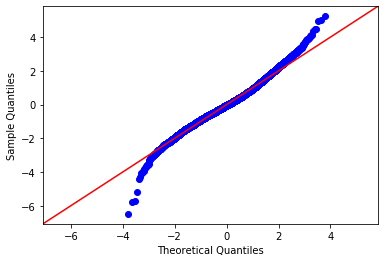

In [363]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

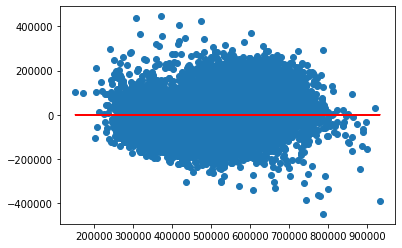

In [364]:
plt.scatter(model4.predict(preprocessed), model.resid)
plt.plot(model4.predict(preprocessed), [0 for i in range(len(preprocessed))],c='red');

In [365]:
#Stepwise Selection

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  sqft_above_log                 with p-value 0.0
Add  grade_9                        with p-value 7.15015e-109
Add  grade_10                       with p-value 2.25183e-121
Add  grade_8                        with p-value 2.81301e-93
Add  zip_98038                      with p-value 3.31823e-81
Add  zip_98042                      with p-value 9.28433e-89
Add  zip_98058                      with p-value 2.59519e-91
Add  zip_98023                      with p-value 1.48531e-93
Add  zip_98092                      with p-value 1.44144e-99
Add  zip_98030                      with p-value 1.42186e-72
Add  zip_98031                      with p-value 2.84907e-70
Add  zip_98115                      with p-value 2.00651e-58
Add  zip_98004                      with p-value 6.33977e-61
Add  zip_98003                      with p-value 2.71925e-54
Add  zip_98059                      with p-value 1.22136e-52
Add  zip_98055                      with p-value 5.97874e-56
Add  zip_98117                

In [366]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model5 = sm.OLS(y,X_with_intercept).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     380.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:11:38   Log-Likelihood:            -1.8022e+05
No. Observations:               14226   AIC:                         3.606e+05
Df Residuals:                   14148   BIC:                         3.612e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.118e+05   2474.620    125.992      0.000    3.07e+05    3.17e+05
sqft_above_log  4.277e+04   1088.452     39.291      0.000    4.06e+04    4.49e+04
grade_9         9.826e+04   2632.074     37.331      0.000    9.31e+04    1.03e+05
grade_10        1.423e+05   4633.495     30.719      0.000    1.33e+05    1.51e+05
grade_8         3.515e+04   1702.888     20.643      0.000    3.18e+04    3.85e+04
zip_98042      -3.684e+04   5329.077     -6.913      0.000   -4.73e+04   -2.64e+04
zip_98023      -6.262e+04   6485.959     -9.655      0.000   -7.53e+04   -4.99e+04
zip_98092      -6.118e+04   6090.373    -10.046      0.000   -7.31e+04   -4.92e+04
zip_98030      -4.669e+04   7733.819     -6.037      0.000   -6.18e+04   -3.15e+04
zip_98031      -3.479e+04   7454.887     -4.666      0.000   -4.94e+04   -2.02e+04
zip_98115       2.807e+05   4382.547     64.046      0.000    2.72e+05    2.89e+05
zip_98004       3.909e+05   9731.307     40.166      0.000    3.72e+05     4.1e+05
zip_98003      -4.205e+04   8263.821     -5.088      0.000   -5.82e+04   -2.59e+04
zip_98117       2.802e+05   4430.119     63.240      0.000    2.71e+05    2.89e+05
zip_98040       3.466e+05   9716.007     35.678      0.000    3.28e+05    3.66e+05
zip_98103        2.81e+05   4379.890     64.168      0.000    2.72e+05     2.9e+05
zip_98112       3.609e+05   7849.984     45.973      0.000    3.46e+05    3.76e+05
zip_98199       3.049e+05   6078.225     50.166      0.000    2.93e+05    3.17e+05
zip_98105       3.284e+05   7046.702     46.599      0.000    3.15e+05    3.42e+05
zip_98033       2.455e+05   5223.551     46.995      0.000    2.35e+05    2.56e+05
zip_98119       3.417e+05   7850.677     43.522      0.000    3.26e+05    3.57e+05
sqft_lot_log    3.618e+04    889.099     40.697      0.000    3.44e+04    3.79e+04
zip_98107       2.894e+05   5630.209     51.400      0.000    2.78e+05       3e+05
zip_98116       2.666e+05   5382.542     49.531      0.000    2.56e+05    2.77e+05
zip_98122       2.706e+05   5739.970     47.150      0.000    2.59e+05    2.82e+05
zip_98022       -6.71e+04   8343.267     -8.042      0.000   -8.34e+04   -5.07e+04
zip_98109       3.608e+05   1.03e+04     35.133      0.000    3.41e+05    3.81e+05
zip_98052       2.129e+05   4218.234     50.480      0.000    2.05e+05    2.21e+05
zip_98005       2.755e+05   8251.492     33.391      0.000    2.59e+05    2.92e+05
zip_98006       2.165e+05   5277.426     41.028      0.000    2.06e+05    2.27e+05
zip_98102       3.326e+05   1.02e+04     32.530      0.000    3.13e+05    3.53e+05
zip_98136       2.215e+05   5837.962     37.948      0.000     2.1e+05    2.33e+05
zip_98144       2.189e+05   5432.120     40.294      0.000    2.08e+05     2.3e+05
zip_98008       2.021e+05   5465.331     36.987      0.000    1.91e+05    2.13e+05
bathrooms_lo

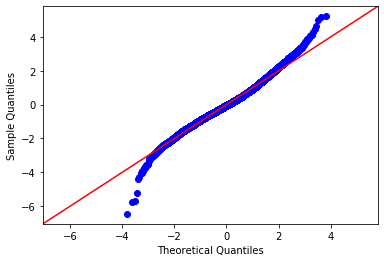

In [367]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

Observation: There seems a linear relationship between price and grade. Summary points:

1. Zipcodes 98039 has higher price .
2. Houses with 2.5 floors will yield more profit
3. Bathrooms has strong positive correlation with price.
4. Bedrooms also has moderate positive correlation with price.
5. Renovated houses seems to have higher price than non-renovated
6. A house with waterfront feature also has higher price for a house.

In [368]:
# for i in range(80,100):
#     q = i/100
#     print("{} percentile: {}".format(q, data_final.price.quantile(q=q)))

In [369]:
# orig_tot = len(data_final)
# data_final = data_final[data_final.price < 900000] # Subsetting to remove extreme outliers
# print('Percent removed:', (orig_tot -len(data_final))/orig_tot)
# data_final.price = data_final.price.map(np.log) # Applying a log transformation
# train, test = train_test_split(data_final)

In [370]:
# outcome2 = 'price'
# predictors_2 = data_final.drop('price', axis=1)
# pred_sum_2 = '+'.join(predictors_2.columns)
# formula = outcome2 + '~' + pred_sum_2

# model2 = ols(formula=formula, data=data_final).fit()
# model2.summary()

In [371]:
# fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

In [407]:
# plt.scatter(model2.predict(predictors_2), model2.resid)
# plt.plot(model2.predict(predictors_2), [0 for i in range(len(predictors_2))]);

In [408]:
# from scipy.stats import norm

# # sns.distplot(data_final, fit=norm, bins=60, kde=False);
# # fig = plt.figure()
# # res = stats.probplot(data_final, plot=plt)

# sns.distplot(data_final, fit=norm, bins=60, kde=False,color='red');
# fig = plt.figure()
# res = stats.probplot(data_final, plot=plt)


Observation
Complex Model_4 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression for degree=2 and for features 2 is best solution.

In [403]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

features2 = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']

polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(king_data[features2])
#xtest_poly=polyfeat.fit_transform(king_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,king_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(king_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, king_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, king_data['price']), 3))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Complex Model_3
Mean Squared Error (MSE)  180548.98
R-squared (training)  0.758
R-squared (testing)  0.758


* You provide at least 1 paragraph explaining your final model.   
* You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset. 

In [413]:
# # Show a correlation and coeff for the 3 coeff
# king_data[features2]=polyfeat.fit_transform(king_data[features2])
# X_fin = king_data[features2]
# X_with_intercept = sm.add_constant(X_fin)
# model5 = sm.OLS(y,X_with_intercept).fit()
# model5.summary()

In [ ]:
# import statsmodels.api as sm
# import scipy.stats as stats

# fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

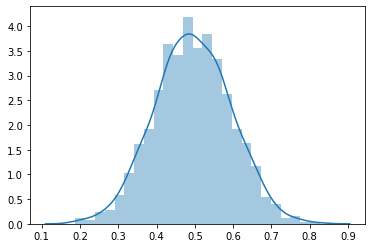

In [425]:
import numpy as np
import seaborn as sns

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.distplot(s);

In [ ]:
# Predicting house prices is an extremely complex and challenging problems because houses
vary widely and house prices are not only based on the physical properties of a house but also on
the emotional, social and financial position of the parties involved.
Our results indicate that in order to provide accurate predictions of house prices, a very large
number of features must be used and that they most likely need to be combined with a powerful,
complex and non-linear model.

In [ ]:
#We can see that the most important features are the size of the living area, the grade and the year
of construction, with older houses being worth less than newer builds. It is also interesting that the
learned model has produced a negative relationship between the number of bedrooms and the price
but a positive one between the number of bathrooms and the price. This seems counter-intuitive
and is probably the result of an unexpected interaction between features.

In [ ]:
# During the EDA, we came across lot of outliers in terms of prices and other featues. We would like to take a look into that data.
# Also, segment the houses into luxury houses and ordinary houses. Also take into consideration the amenities and the
# neighbourhood of the locality that definitely increase the price of a house.